### Data Understanding 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
 data=pd.read_csv("bbc-text.csv")
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['category'] = le.fit_transform(data['category'])

In [4]:
data

,category,text
0,4,tv future in the hands of viewers with home th...
1,0,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raids box office ocean s twelve...
5,2,howard hits back at mongrel jibe michael howar...
6,2,blair prepares to name poll date tony blair is...
7,3,henman hopes ended in dubai third seed tim hen...
8,3,wilkinson fit to face edinburgh england captai...
9,1,last star wars not for children the sixth an...


In [5]:
data[data.duplicated() == True].count()

category    99
text        99
dtype: int64

In [6]:
print(data.shape)
print(data.columns)

(2225, 2)
Index(['category', 'text'], dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
category    2225 non-null int64
text        2225 non-null object
dtypes: int64(1), object(1)
memory usage: 34.8+ KB


In [8]:
data[data.duplicated() == True].count()


category    99
text        99
dtype: int64

In [9]:
data.drop_duplicates(keep=False,inplace=True) 

In [10]:
data[data.duplicated() == True].count()


category    0
text        0
dtype: int64

In [11]:
print(data.shape)

(2027, 2)


#### Now we have cleansed the data of duplicate values

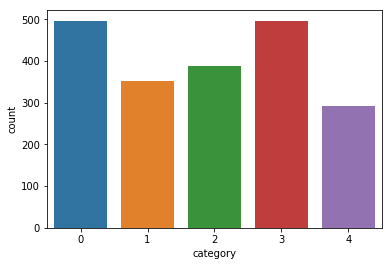

In [12]:
sns.countplot(x='category', data=data)

#### This graph shows the number of sentences each class has

### Pre Processing

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(raw_text):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    words  = [WordNetLemmatizer().lemmatize(w) for w in words]
    
    #Stemming
    words = [SnowballStemmer('english').stem(word) for word in words]
    
    words = [word for word in words if len(word)>3]
    
    return(" ".join(words))

In [14]:
data['clean_text'] = data['text'].apply(lambda x: preprocess(x))
data['clean_text']

0       futur hand viewer home theatr system plasma hi...
1       worldcom left book alon former worldcom berni ...
2       tiger wari farrel gambl leicest rush make andi...
3       yead face newcastl premiership side newcastl u...
5       howard back mongrel jibe michael howard said c...
6       blair prepar name poll date toni blair like na...
7       henman hope dubai third seed henman slump stra...
8       wilkinson face edinburgh england captain jonni...
9       last star child sixth final star movi suitabl ...
10      berlin cheer anti nazi film german movi anti n...
11      virgin blue share plummet share australian bud...
12      crude price back cold weather across part unit...
14      moya emot davi carlo moya describ spain davi v...
15      korean credit card firm rescu south korea larg...
16      howard back stem cell research michael howard ...
17      connor boost british tenni former world number...
18      japanes bank battl japan sumitomo mitsui finan...
19      game m

In [15]:
data

,category,text,clean_text
0,4,tv future in the hands of viewers with home th...,futur hand viewer home theatr system plasma hi...
1,0,worldcom boss left books alone former worldc...,worldcom left book alon former worldcom berni ...
2,3,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest rush make andi...
3,3,yeading face newcastle in fa cup premiership s...,yead face newcastl premiership side newcastl u...
5,2,howard hits back at mongrel jibe michael howar...,howard back mongrel jibe michael howard said c...
6,2,blair prepares to name poll date tony blair is...,blair prepar name poll date toni blair like na...
7,3,henman hopes ended in dubai third seed tim hen...,henman hope dubai third seed henman slump stra...
8,3,wilkinson fit to face edinburgh england captai...,wilkinson face edinburgh england captain jonni...
9,1,last star wars not for children the sixth an...,last star child sixth final star movi suitabl ...
10,1,berlin cheers for anti-nazi film a german movi...,berlin cheer anti nazi film german movi anti n...


In [16]:
print(len(data['text'][0]))

4333


In [17]:
print((data['clean_text'][0]))

futur hand viewer home theatr system plasma high definit digit video record move live room peopl watch radic differ five year time accord expert panel gather annual consum electron show vega discus technolog impact favourit pastim lead trend programm content deliv viewer home network cabl satellit telecom compani broadband servic provid front room portabl devic talk technolog digit person video record like tivo system allow peopl record store play paus forward wind programm want essenti technolog allow much personalis also built high definit busi japan slower take europ lack high definit program peopl forward wind advert also forget abid network channel schedul togeth cart entertain network cabl satellit compani worri mean term advertis revenu well brand ident viewer loyalti channel although lead technolog moment also concern rais europ particular grow uptak servic like happen today nine month year time adam hume broadcast futurologist told news websit like issu lost advertis revenu pr

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

Train_Vector = TfidfVectorizer() # Tf-Idf
tfs = Train_Vector.fit_transform(data['clean_text'])

In [36]:
print(tfs)
x=tfs
y=data['category']

  (0, 5911)	0.05586485406199641
  (0, 6653)	0.05759279001731167
  (0, 16436)	0.1645177544592633
  (0, 7092)	0.048253069494908235
  (0, 15303)	0.04421027340682526
  (0, 15020)	0.05881547382924406
  (0, 11622)	0.06184956502954957
  (0, 6980)	0.09678978485011976
  (0, 3865)	0.14920649674328768
  (0, 4114)	0.06864759924839545
  (0, 16426)	0.06711852750400822
  (0, 12434)	0.1531432815005346
  (0, 10163)	0.02360056008342351
  (0, 8922)	0.029492455313742973
  (0, 12977)	0.08225887722963166
  (0, 11378)	0.13104153475279845
  (0, 16646)	0.1708995542275153
  (0, 12222)	0.048913036799344785
  (0, 4106)	0.029117306493474746
  (0, 5528)	0.024268916775084543
  (0, 17128)	0.025615120971387587
  (0, 15427)	0.03283815629510727
  (0, 86)	0.026789421335332568
  (0, 5143)	0.03720145960064149
  (0, 11142)	0.08490057487589939
  :	:
  (2026, 11095)	0.07910828071514446
  (2026, 11808)	0.060337360549828065
  (2026, 4589)	0.12344574893660784
  (2026, 11651)	0.09216686957430376
  (2026, 16830)	0.0698988872994845

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, \
                                                    random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1418, 17248)
(1418,)
(609, 17248)
(609,)


In [38]:
from sklearn.linear_model import LogisticRegression

Regressor1 = LogisticRegression()
Regressor1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
y_pred1 = Regressor1.predict(x_test)


In [40]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
score_1=accuracy_score(y_test,y_pred1)
print('Accuracy score:',score_1)

Accuracy score: 0.9523809523809523


In [79]:
pred = Regressor1.predict_proba(x_test)
from sklearn.metrics import log_loss
i=log_loss(y_test,pred)
print(i)

0.5129376465265696


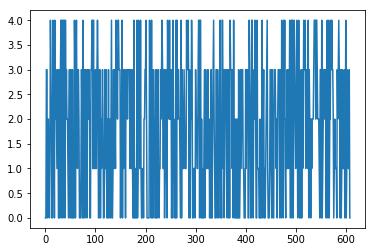

In [82]:
plt.plot()


In [50]:
from sklearn.neighbors import KNeighborsClassifier

Regressor2 = KNeighborsClassifier(n_neighbors=7)
Regressor2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [51]:
y_pred2 = Regressor2.predict(x_test)

In [52]:
score_2=accuracy_score(y_test,y_pred2)
print('Accuracy score:',score_1)

Accuracy score: 0.9523809523809523


In [53]:
pred2 = Regressor2.predict_proba(x_test)
from sklearn.metrics import log_loss
log_loss(y_test,pred2)

0.45629353056349664

In [56]:
from sklearn.naive_bayes import MultinomialNB
Regressor3 = MultinomialNB()
Regressor3.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
y_pred3 = Regressor3.predict(x_test)

In [58]:
score_3=accuracy_score(y_test,y_pred3)
print('Accuracy score:',score_3)

Accuracy score: 0.9310344827586207


In [59]:
pred3 = Regressor3.predict_proba(x_test)
from sklearn.metrics import log_loss
log_loss(y_test,pred3)

0.33942629561928234

In [61]:
from sklearn.tree import DecisionTreeClassifier

Regressor4 = DecisionTreeClassifier(criterion='gini')
Regressor4.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [62]:
y_pred4 = Regressor4.predict(x_test)

In [63]:
score_4=accuracy_score(y_test,y_pred4)
print('Accuracy score:',score_4)

Accuracy score: 0.825944170771757


In [64]:
pred4 = Regressor4.predict_proba(x_test)
from sklearn.metrics import log_loss
log_loss(y_test,pred4)

6.011675365945051

In [66]:
from sklearn.ensemble import RandomForestClassifier

Regressor5 = RandomForestClassifier(criterion='gini')
Regressor5.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
y_pred5 = Regressor5.predict(x_test)

In [68]:
score_5=accuracy_score(y_test,y_pred5)
print('Accuracy score:',score_5)

Accuracy score: 0.8735632183908046


In [69]:
pred5 = Regressor5.predict_proba(x_test)
from sklearn.metrics import log_loss
log_loss(y_test,pred5)

0.5861017220225039

In [70]:
from sklearn.svm import SVC

Regressor6 = SVC(kernel='linear')
Regressor6.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
y_pred6 = Regressor6.predict(x_test)


In [72]:
score_6=accuracy_score(y_test,y_pred6)
print('Accuracy score:',score_6)

Accuracy score: 0.9671592775041051


In [73]:
pred6 = Regressor6.predict_proba(x_test)
from sklearn.metrics import log_loss
log_loss(y_test,pred6)

AttributeError: predict_proba is not available when  probability=False